<a href="https://colab.research.google.com/github/srirhyuyy2101/Aplikasi-Login/blob/main/latihan_deksripsi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_Nasabah.csv to Data_Nasabah.csv


In [ ]:
data = pd.read_csv('Data_Nasabah.csv', delimiter=";")

In [12]:
#melihat beberapa baris pertama data
print("\nLima Baris Pertama Data:")
print(data.head())

# Jumlah data (baris dan kolom)
print("Jumlah data (baris, kolom):", data.shape)

# Informasi tentang tipe data dan skema pengkodean
print("\nInformasi tipe data dan skema pengkodean:")
print(data.info())

# Melakukan pengkodean pada kolom kategorikal
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-Laki': 1, 'Perempuan': 2})
data['jenis_produk'] = data['jenis_produk'].map({'tabungan': 1, 'kartu_kredit': 2, 'deposito': 3})
data['pengguna_mobile_banking'] = data['pengguna_mobile_banking'].map({'YA': 1, 'TIDAK': 2})
print(data.head()) # Memastikan perubahan

# Statistik deskriptif untuk data numerik
print("\nStatistik deskriptif untuk data numerik:")
print(data.describe())

# Melihat beberapa baris pertama data
print("\nBeberapa baris pertama data:")
print(data.head())

# Menampilkan jumlah nilai unik untuk setiap kolom (untuk memahami kategori)
print("\nJumlah nilai unik untuk setiap kolom:")
for column in data.columns:
  print(f"{column}: {data[column].nunique()}")


Lima Baris Pertama Data:
  nasabah_id  umur  jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22              2     5800000          1508000   
1       N002    64              2     5700000          1254000   
2       N003    27              2     2950000           590000   
3       N004    34              2     3100000           186000   
4       N005    45              1     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19             1                          1   
1                 9             2                          2   
2                12             1                          1   
3                16             3                          5   
4                15             2                          3   

   pengguna_mobile_banking  skor_kredit  
0                        2          900  
1                        2          900  
2                        1          500  
3                       

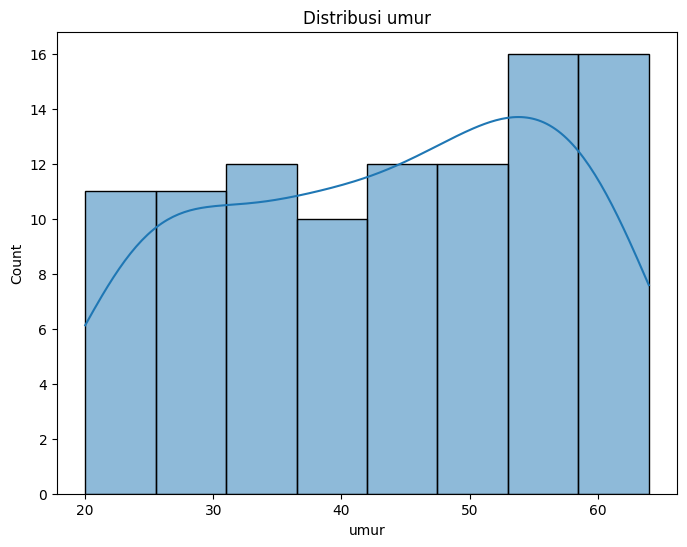

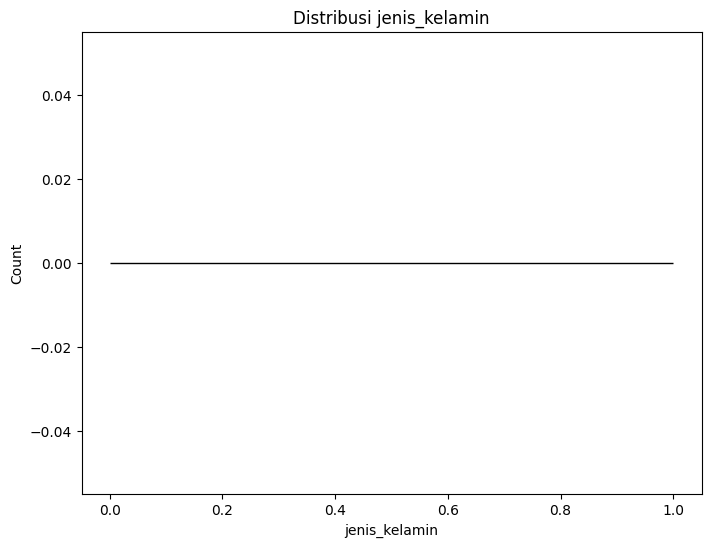

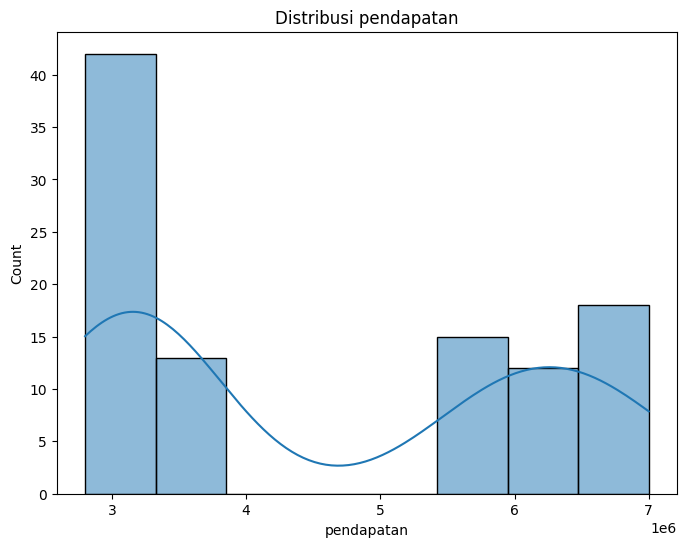

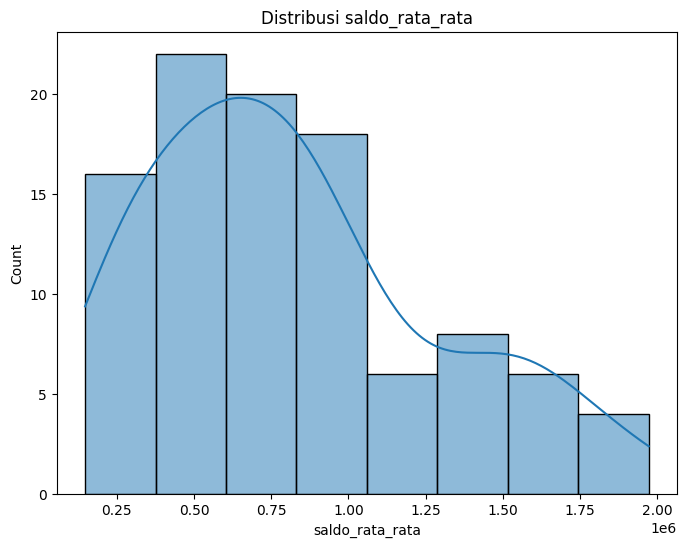

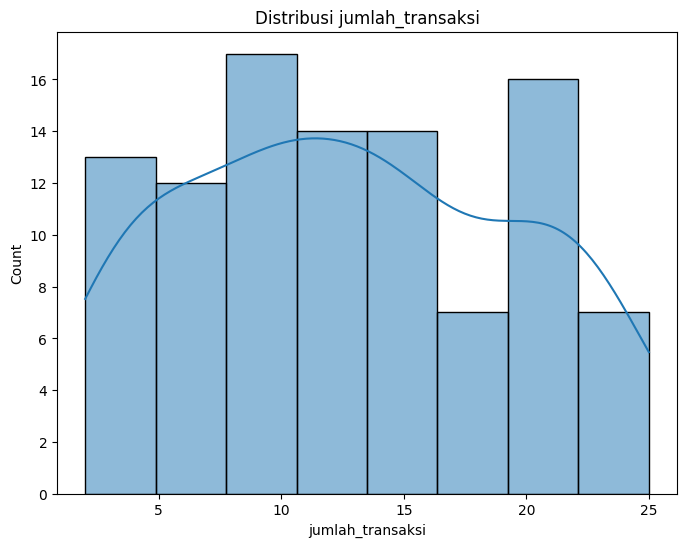

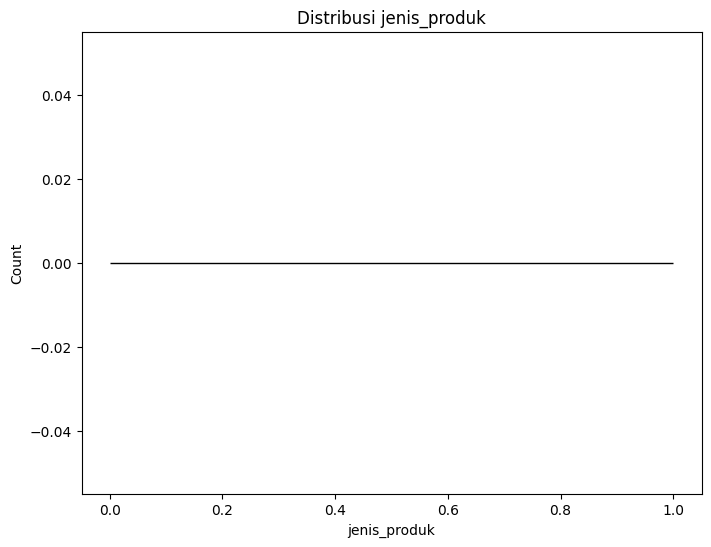

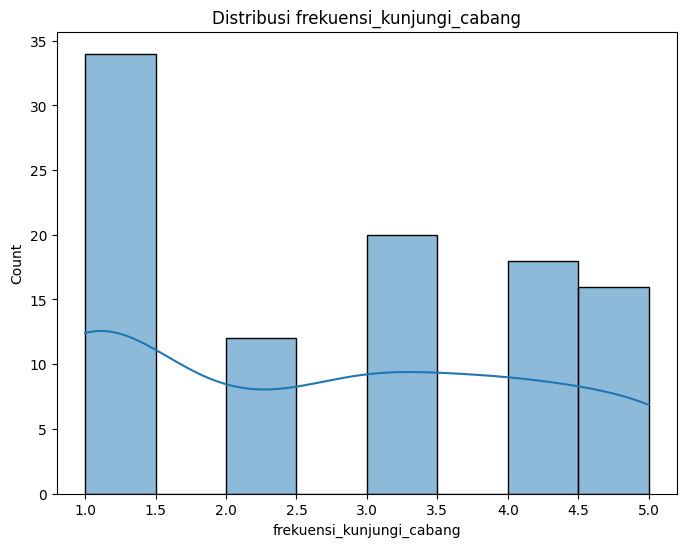

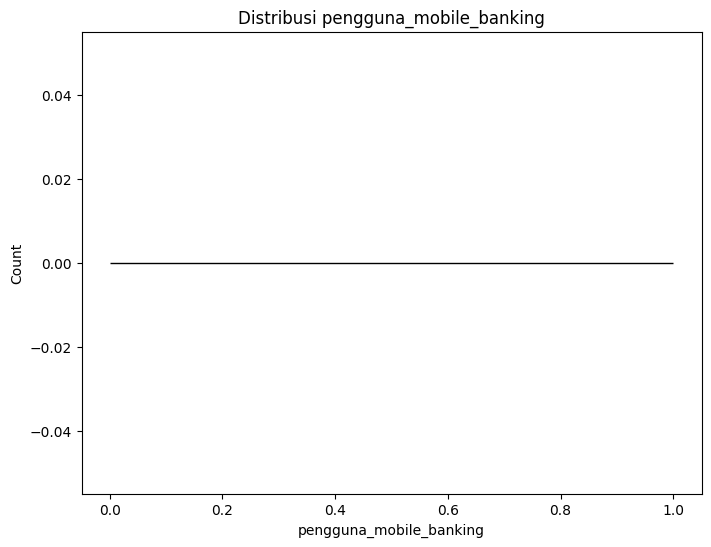

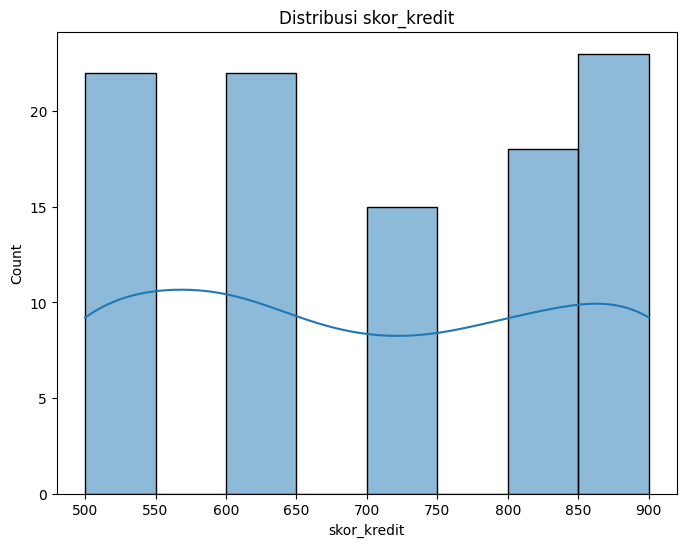

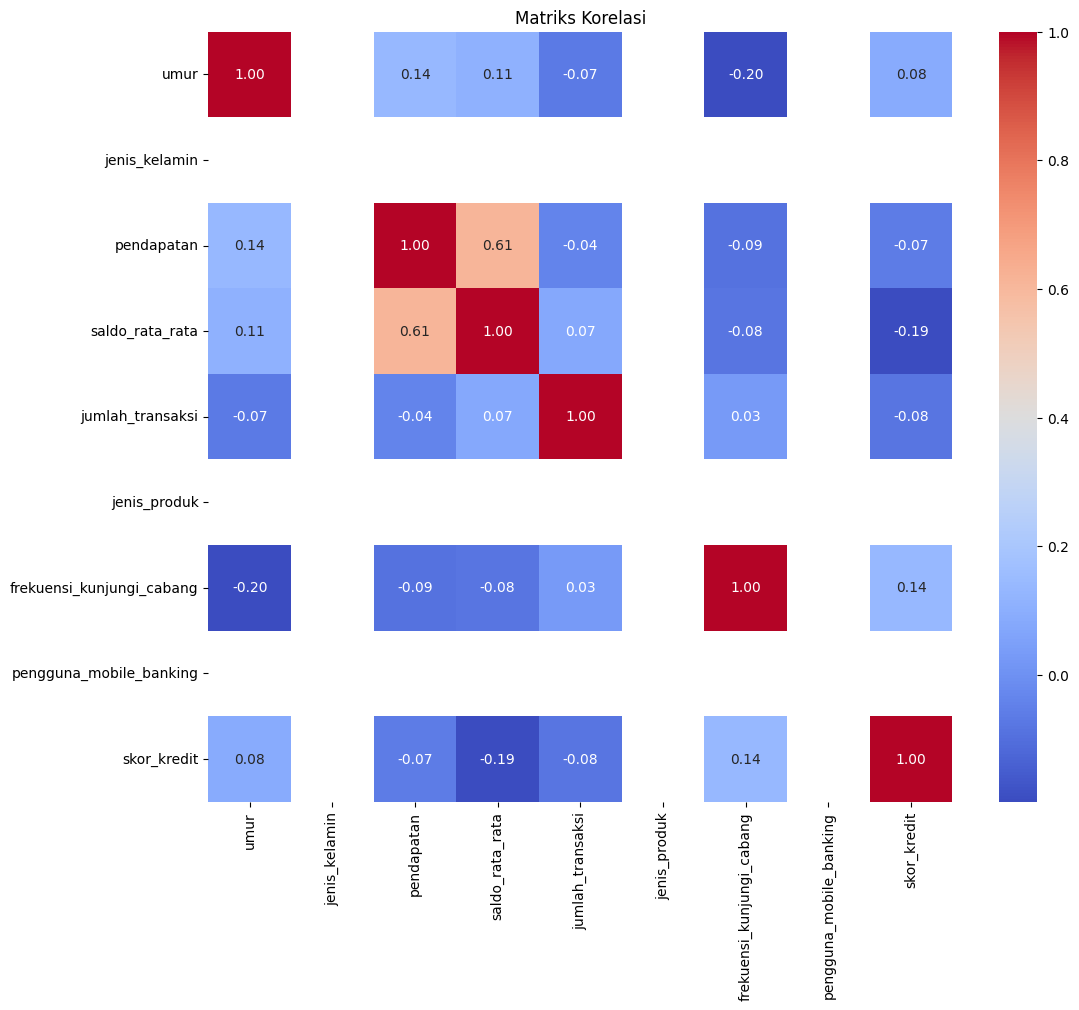

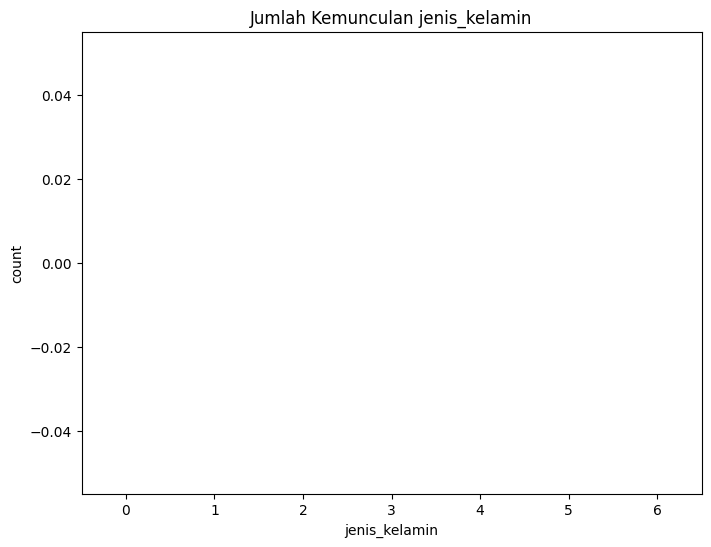

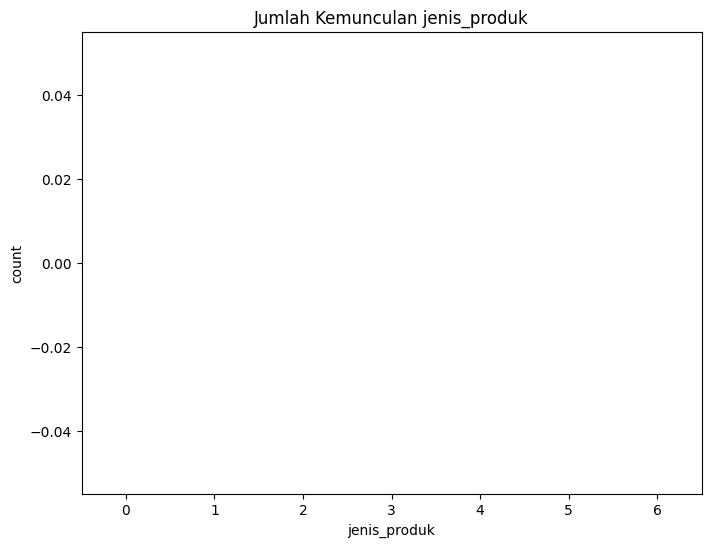

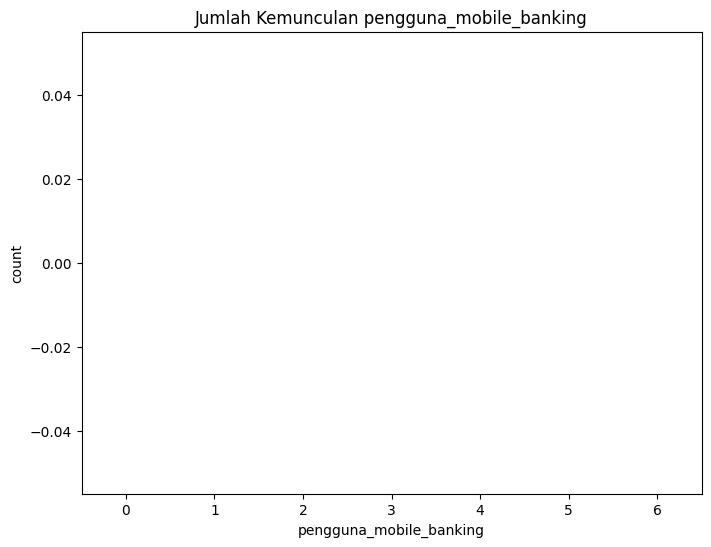


Jumlah Nilai Hilang Setiap Kolom:
nasabah_id                     0
umur                           0
jenis_kelamin                100
pendapatan                     0
saldo_rata_rata                0
jumlah_transaksi               0
jenis_produk                 100
frekuensi_kunjungi_cabang      0
pengguna_mobile_banking      100
skor_kredit                    0
dtype: int64


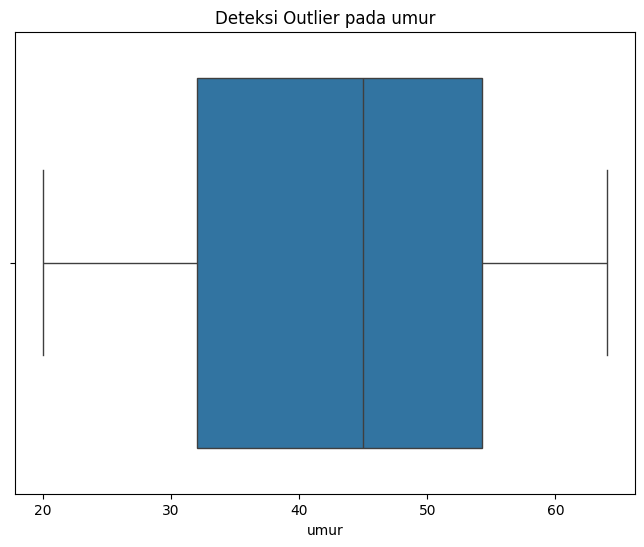

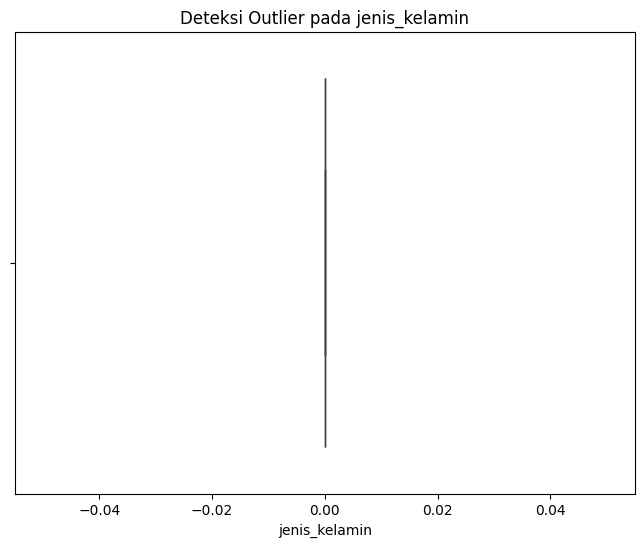

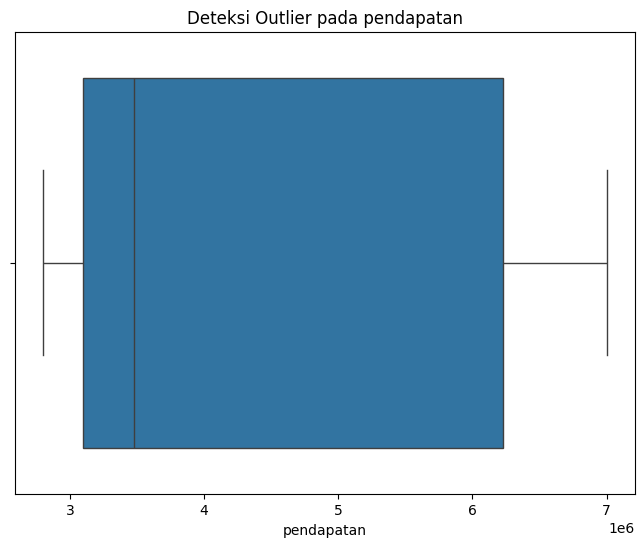

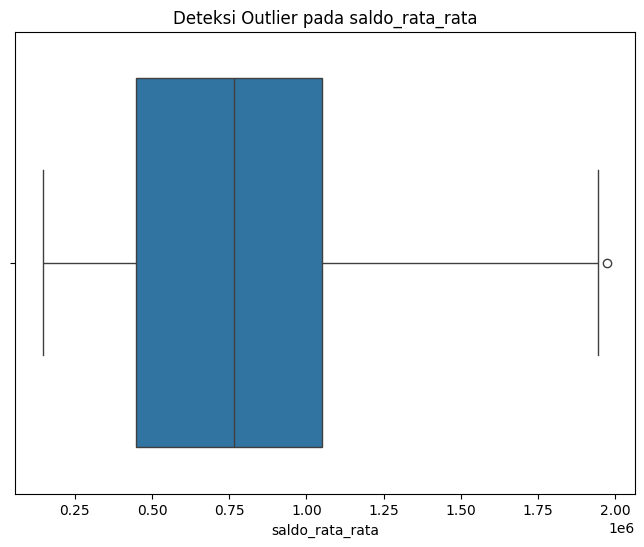

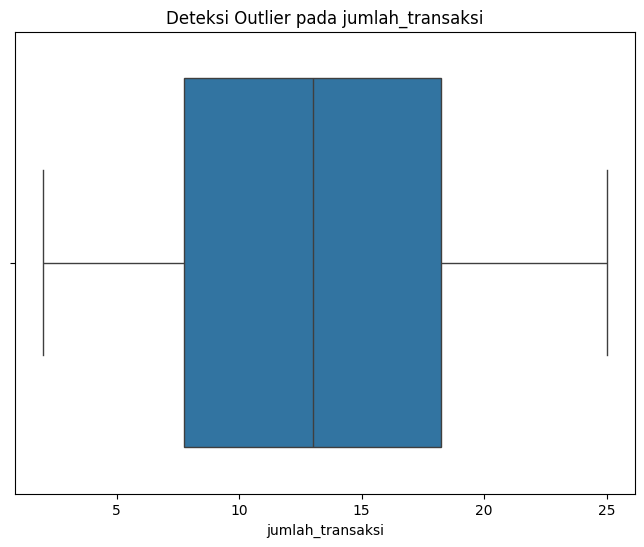

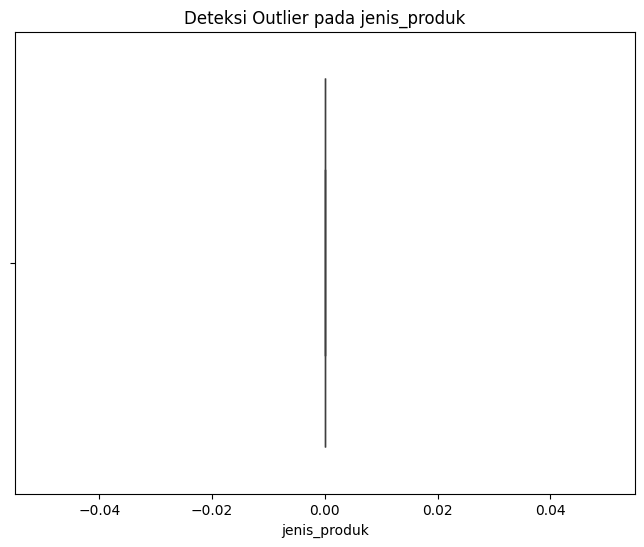

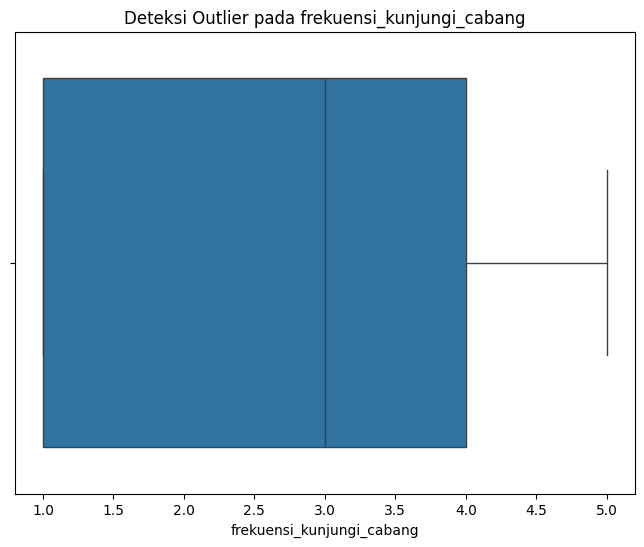

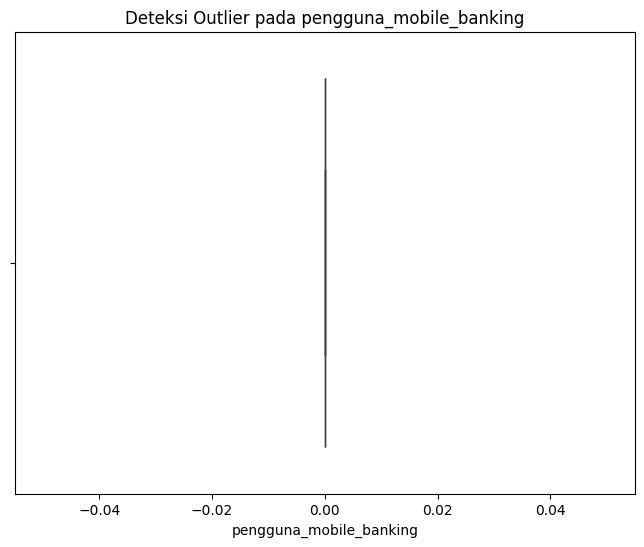

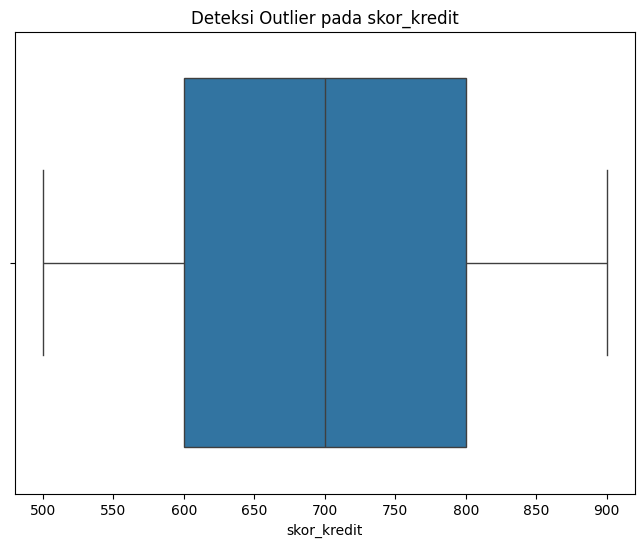

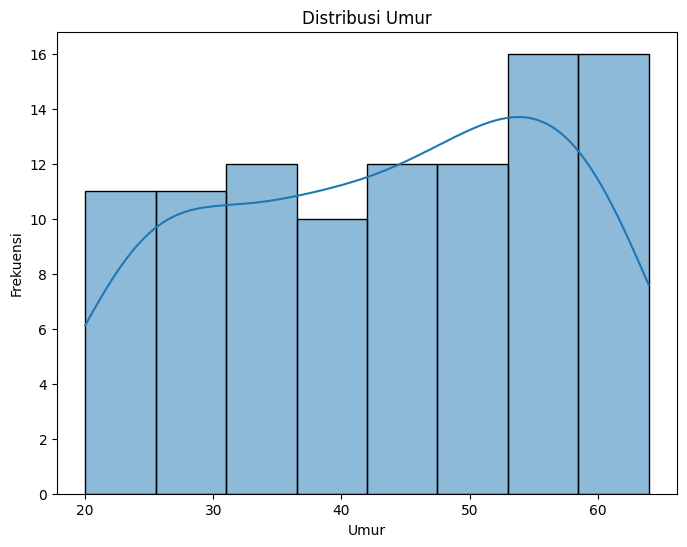

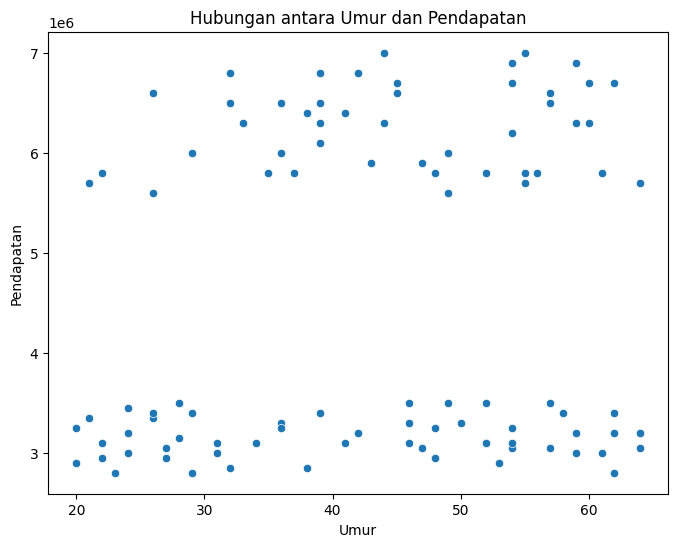

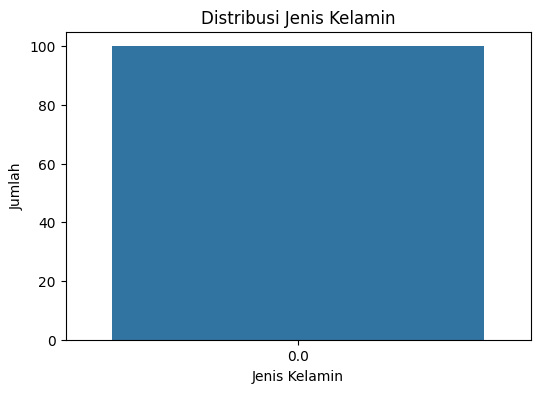

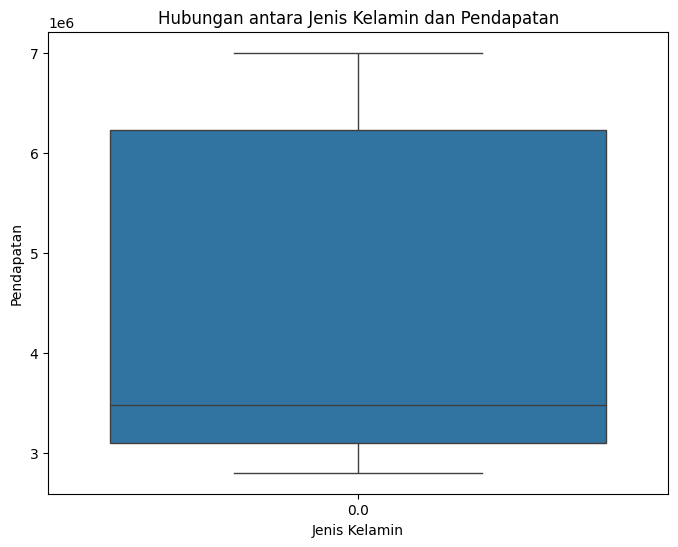

In [16]:
# Analisis Distribusi Data Numerik
numerical_features = data.select_dtypes(include=['number']).columns
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], kde=True)
  plt.title(f"Distribusi {feature}")
  plt.show()

# Analisis Korelasi antar Variabel
# Exclude non-numeric columns like 'nasabah_id' before calculating correlation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Analisis Data Categorical (already encoded in previous cell)
# We can visualize the distribution of the encoded categorical columns
encoded_categorical_features = ['jenis_kelamin', 'jenis_produk', 'pengguna_mobile_banking']
for feature in encoded_categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=data)
  plt.title(f"Jumlah Kemunculan {feature}")
  plt.xticks(rotation=0) # Keep ticks horizontal for encoded values
  plt.show()


# Analisis Nilai Hilang (Missing Values)
missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang Setiap Kolom:")
print(missing_values)

# Fill missing values in the encoded categorical columns with 0
for feature in encoded_categorical_features:
  data[feature] = data[feature].fillna(0)

# Analisis Outlier (Nilai Aneh)
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[feature])
  plt.title(f"Deteksi Outlier pada {feature}")
  plt.show()

# Menampilkan distribusi data untuk kolom tertentu
# (misalnya, 'Umur')
plt.figure(figsize=(8, 6))
sns.histplot(data['umur'], kde=True) # Corrected column name to 'umur'
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Analisis hubungan antara dua variabel (misalnya, 'Umur' dan 'Pendapatan')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umur', y='pendapatan', data=data) # Corrected column names
plt.title('Hubungan antara Umur dan Pendapatan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan')
plt.show()

# Menampilkan distribusi data untuk kolom 'Jenis Kelamin'
plt.figure(figsize=(6, 4))
sns.countplot(x='jenis_kelamin', data=data) # Corrected column name
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan hubungan antara 'Jenis Kelamin' dan 'Pendapatan'
plt.figure(figsize=(8, 6))
sns.boxplot(x='jenis_kelamin', y='pendapatan', data=data) # Corrected column names
plt.title('Hubungan antara Jenis Kelamin dan Pendapatan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan')
plt.show()